In [1]:
from utils import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from framspy.FramsticksLib import *
import pandas as pd 


In [2]:
pathframs = "/home/adam/Framsticks/Framsticks50rc19"
framsLib = FramsticksLib(pathframs,None,["/home/adam/thesis/VGAE/framspy/eval-allcriteria.sim"])
pathdata ="/home/adam/thesis/VGAE/decoded.pkl"
frams.init(pathframs)
FramsManager = FramsManager(pathframs)

Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

Available objects: ['CheckpointEvent', 'Collision', 'CrCollision', 'Creature', 'CreatureSettings', 'CreatureSignals', 'CreatureSnapshot', 'Dictionary', 'ExpProperties', 'ExpState', 'ExtValue', 'File', 'FunctionReference', 'GenMan', 'GenManStats', 'GenePool', 'GenePools', 'Geno', 'Genotype', 'Interface', 'Joint', 'Loader', 'Math', 'MechJoint', 'MechPart', 'MessageCatcher', 'Model', 'ModelGeometry', 'ModelSymmetry', 'Neuro', 'NeuroClass', 'NeuroClassLibrary', 'NeuroDef', 'NeuroSignals', 'NeuronsSimEnabled', 'ODE', 'Orient', 'Part', 'Population', 'Populations', 'Ref', 'Signal', 'SignalView', 'SimilMeasure', 'SimilMeasureDistribution', 'SimilMeasureGreedy', 'SimilMeasureHungarian', 'Simulator', 'SlaveSimulators', 'StopEvent', 'String', 'UserScripts', 'Vector', 'WireframeAppearance', 'World', 'WorldMap', 'WorldSignal

In [3]:
def gen_plots(val,z,name):
    np.set_printoptions(precision=4)
    min_val = min(val)
    max_val = max(val)
    plt.scatter(df_pca['pca_0'], df_pca['pca_1'], s=0.5, c=val)
    plt.title("{0} min:{1} max:{2}".format(name,min_val,max_val))
    plt.savefig("pca_{0}.pdf".format(name))

In [4]:
ranges = [[0,0.00001],[0,0.0001],[0,0.001],[0,0.01],[0,1],[0,1],[0,10],[0,100],[0,1000]]

r = ranges[6]
pathdata ="/home/adam/thesis/VGAE/decoded_{0}_{1}.pkl".format(r[0],r[1])
df_all = pd.read_pickle(pathdata)
df_all

,decA,decX,z
0,"[[0.7251169, 0.3847619, 0.74090266, 0.4983815,...","[[-1.0, -1.0, 9.114877], [-1.0, -1.0, -1.0], [...","[8.672555005628533, 9.244049245613382, 1.54385..."
0,"[[0.7696123, 0.50808954, 0.64100444, 0.7297565...","[[-1.0, -1.0, 9.647531], [-1.0, -1.0, -1.0], [...","[2.2130285152147113, 8.330821285216128, 4.8721..."
0,"[[0.45428762, 0.57583606, 0.35068956, 0.397166...","[[-1.0, -1.0, 14.656264], [-1.0, -1.0, -1.0], ...","[4.294509513929961, 0.16270069967865064, 5.529..."
0,"[[0.6088514, 0.4835453, 0.58934015, 0.54217756...","[[-1.0, -1.0, 17.2696], [-1.0, -1.0, -1.0], [-...","[8.304203489192245, 7.027718318936008, 6.56269..."
0,"[[0.51981723, 0.5234726, 0.47132742, 0.49866, ...","[[-1.0, -1.0, 3.4725833], [-1.0, -1.0, -1.0], ...","[1.044203143976844, 1.2605017590351697, 2.2224..."
...,...,...,...
0,"[[0.60560834, 0.5749188, 0.43105304, 0.5323776...","[[-1.0, -1.0, 13.543776], [-1.0, -1.0, -1.0], ...","[2.928585659978713, 4.834129165164511, 7.41890..."
0,"[[0.54280096, 0.5667623, 0.41162372, 0.4845342...","[[-1.0, -1.0, 23.492147], [-1.0, -1.0, -1.0], ...","[8.888070740135719, 6.469114502234838, 9.73642..."
0,"[[0.50529045, 0.46203145, 0.57477236, 0.411927...","[[-1.0, -1.0, 16.488083], [-1.0, -1.0, -1.0], ...","[9.656527066053751, 2.512204292486535, 4.33088..."
0,"[[0.44350734, 0.6062325, 0.30198833, 0.3719823...","[[-1.0, -1.0, 19.963238], [-1.0, -1.0, -1.0], ...","[5.65498413742774, 1.3281017633225378, 8.04242..."


In [69]:

frams_gen,z_all = gen_f0_from_df(df_all)

In [70]:
gen_correct = []
z_correct = []
for i in range(len(frams_gen)):
#     print(i)
    gen = frams_gen[i]
    z = z_all[i]
    gen = FramsManager.check_consistency_for_gen(gen)
    if gen is not None:
        gen = FramsManager.reduce_joint_length_for_gen(gen)
    if gen is not None:
        gen_correct.append(gen)
        z_correct.append(z)
print((len(gen_correct)))

500


In [71]:
print(len(gen_correct))
print(len(z_correct))

500
500


In [72]:
print(gen_correct[0])

//0
p:0.2, 0.69, 0.96
p:0.93, 0.78, 0.01
p:0.93, 0.93, 0.24
p:0.65, 0.91, 0.94
p:0.0, 0.39, 0.31
p:0.91, 0.03, 0.85
p:0.8, 0.2, 0.45
p:0.42, 0.1, 0.2
p:0.84, 0.91, 0.0
p:0.59, 0.97, 0.98
p:0.22, 0.9, 0.76
p:0.27, 0.75, 0.08
p:0.86, 0.15, 0.07
p:0.01, 0.19, 0.92
p:0.9, 0.91, 0.01
j:0, 2
j:1, 2
j:14, 1
j:8, 14
j:10, 0
j:9, 10
j:3, 9
j:13, 0
j:11, 8
j:4, 11
j:7, 4
j:12, 7
j:6, 12
j:5, 6



In [73]:
c = framsLib.evaluate(gen_correct)
c

[{'num': 880,
  'name': 'Ymikah Tihih',
  'evaluations': {'': {'fit_stdev': 1.300245099850277e-19,
    'vertvel': 7.941195895311282e-14,
    'numjoints': 14,
    'fit': 4.112023490189356e-12,
    'lifespan': 10000.0,
    'instances': 0,
    'numparts': 15,
    'numneurons': 0,
    'time': 0.06316602230072021,
    'vertpos': 0.06850551026478727,
    'velocity': 4.112023490189356e-12,
    'distance': 4.1120234901893566e-08,
    'numconnections': 0}}},
 {'num': 881,
  'name': 'Ylasut Hihit',
  'evaluations': {'': {'fit_stdev': 2.853790515859258e-19,
    'vertvel': 2.8353761357888252e-12,
    'numjoints': 14,
    'fit': 1.1822381264844872e-11,
    'lifespan': 10000.0,
    'instances': 0,
    'numparts': 15,
    'numneurons': 0,
    'time': 0.06348252296447754,
    'vertpos': 0.016191464964900683,
    'velocity': 1.1822381264844872e-11,
    'distance': 1.1822381264844871e-07,
    'numconnections': 0}}},
 {'num': 882,
  'name': 'Olicig Titih',
  'evaluations': {'': {'fit_stdev': 3.9246972788

In [74]:
keys = c[0]['evaluations'][''].keys()
keys

dict_keys(['fit_stdev', 'vertvel', 'numjoints', 'fit', 'lifespan', 'instances', 'numparts', 'numneurons', 'time', 'vertpos', 'velocity', 'distance', 'numconnections'])

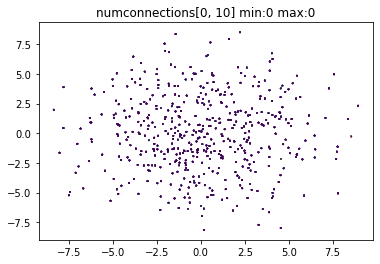

In [75]:
for k in keys:
    values_all = []
    z_all = []
    for i in range(len(c)):
        try:
            v=c[i]['evaluations'][''][k]
            values_all.append(v)
            z_all.append(z_correct[i])
        except:
            pass
#             print(i," is wrong")
#             print(c[i])
    n_comp = 2
    pca = PCA(n_components=n_comp)
    df_z =pd.DataFrame(z_all)
#     print(df_z)
    pca.fit(pd.DataFrame(df_z))

    columns = ['pca_%i' % i for i in range(n_comp)]
    df_pca = pd.DataFrame(pca.transform(df_z), columns=columns, index=df_z.index)
    df_pca.head()
    gen_plots(values_all,df_pca,k+str(r))

In [76]:
# vertpos_all

In [63]:
print(pca.explained_variance_ratio_)

[0.14017301 0.1170794 ]
